# Using pandas data frames to analyze single cell electrophysiology data

### Why Pandas?
Pandas is an open source python library for creating data frames and perforing data analysis. It is relatively user friendly and is excellent for analyzing time-series data, such as physiology traces, over a range of different experimental conditions. Today, we will learn the basics of how to load data from a .csv (spreadsheet) format into a pandas data frame. We will then use pandas to perform some simple analyses and visualization of this data. Days 3 and 4 of this course will dive deeper into the capabilities of pandas, but today should help get you familiar with some of its basic functionality.

###  *** Set file path to day-2 of the python_neurobootcamp ***
* Note, this won't change if we're all working on the same server, might just have to change for each person's user name?

In [1]:
path = '/home/charlie/Desktop/python_bootcamp/python_neurobootcamp/day-2/'

Importing built in python modules

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.signal as ss

Importing custom module called "binary_file_loading_tools" that will help us load our raw data
* Then from this library we import the function called binary_to_csv 
* special note - in order to use binary_to_csv, the python module neo must be installed. This should already be taken care of by your TAs. If not, open a terminal and type: pip install neo

In [3]:
from binary_file_loading_tools import binary_to_csv

## Loading data for a single cell

bin_to_csv loads binary data files created by your patching software (.abf, .dat etc.) and transorms them into .csv files (which it saves under "day-2/csv_data/"). It also returns the data in two pandas data frames. One containing meta data, one containing the physiology traces

* If you're interested in how this function works, or want to modify it to suit your own needs, you can go check it out yourself. We won't cover this in class today for time's sake


In [4]:
meta, data = binary_to_csv(filename=path+'Raw_Data/PV_3_10_03_2014.abf')

saving data in csv format. Stored in csv_data folder


We have now read our data into two pandas data frames: meta and data. However, it is often desirable to load a spreadsheet of data, such as a .csv file. Pandas is very well suited to do this. To demonstrate how this is done, we'll now reload this data from the .csv files that were created by running binary_to_csv

In [5]:
meta = pd.read_csv(path+"csv_data/meta_data_PV_3_10_03_2014.csv", index_col=0)
data = pd.read_csv(path+"csv_data/data_PV_3_10_03_2014.csv",index_col=0)

To take a peak at our data, we can type the name of our data frame, followed by ".head()". This will show us the first 5 rows of the data in spreadsheet format. 

In [6]:
meta.head()

,fs,celltype,date,ch1_units,ch2_units
sweep1,100000.0,PV,10_03_2014,mV,pA
sweep2,100000.0,PV,10_03_2014,mV,pA
sweep3,100000.0,PV,10_03_2014,mV,pA
sweep4,100000.0,PV,10_03_2014,mV,pA
sweep5,100000.0,PV,10_03_2014,mV,pA


* Notice that in our meta data, we have information about the sampling rate (fs), celltype, date of recording, units for ch1 data, and units for ch2 data for each sweep in the binary file that we loaded. This information will become particulalrly useful for analyses where, for example, we want to group anlayses by cell type.

In [7]:
data.head()

,ch1_sweep1,ch2_sweep1,ch1_sweep2,ch2_sweep2,ch1_sweep3,ch2_sweep3,ch1_sweep4,ch2_sweep4,ch1_sweep5,ch2_sweep5,...,ch1_sweep16,ch2_sweep16,ch1_sweep17,ch2_sweep17,ch1_sweep18,ch2_sweep18,ch1_sweep19,ch2_sweep19,ch1_sweep20,ch2_sweep20
0.00000,-48.889160,0.0,-49.652100,0.0,-49.224854,0.0,-48.675537,0.0,-48.187256,0.0,...,-51.330566,0.0,-52.947998,0.0,-55.236816,0.0,-52.856445,0.0,-53.619385,0.0
0.00001,-49.011230,0.0,-49.926758,0.0,-49.194336,0.0,-48.583984,0.0,-47.912598,0.0,...,-51.300049,0.0,-52.947998,0.0,-55.206299,0.0,-52.917480,0.0,-53.466797,0.0
0.00002,-49.072266,0.0,-49.743652,0.0,-49.255371,0.0,-48.400879,0.0,-47.882080,0.0,...,-51.086426,0.0,-52.856445,0.0,-55.023193,0.0,-53.100586,0.0,-53.833008,0.0
0.00003,-48.980713,0.0,-49.682617,0.0,-49.163818,0.0,-48.492432,0.0,-48.095703,0.0,...,-50.994873,0.0,-52.917480,0.0,-55.023193,0.0,-52.917480,0.0,-53.833008,0.0
0.00004,-49.041748,0.0,-49.774170,0.0,-49.041748,0.0,-48.553467,0.0,-48.065186,0.0,...,-51.422119,0.0,-53.100586,0.0,-55.358887,0.0,-52.886963,0.0,-53.619385,0.0


* Though the channels aren't labeled, we can determine what each represents by the their units (pico-amps or milli-volts in this case) which we can get above (in meta data)
* Notice that data contains the time series for each channel on each sweep. The indexes here represent the time points that each value was acquired at

### Some quick pandas tricks for inspecting data frames

In [8]:
# Let's check out the meta data frame

# How many sweeps are there?
print('Rows in meta:')
print(meta.index)

# To only see the number, try:
print('Number of sweeps:')
print(len(meta.index))

# What information do we have about each sweep? i.e. what are the column names?
print('Columns in meta:')
print(meta.columns)

# Can I see only the information for one column?
cols = meta.columns
firstCol = cols[0]
OneCol = meta[firstCol]
OneCol.head()

Rows in meta:
Index([u'sweep1', u'sweep2', u'sweep3', u'sweep4', u'sweep5', u'sweep6',
       u'sweep7', u'sweep8', u'sweep9', u'sweep10', u'sweep11', u'sweep12',
       u'sweep13', u'sweep14', u'sweep15', u'sweep16', u'sweep17', u'sweep18',
       u'sweep19', u'sweep20'],
      dtype='object')
Number of sweeps:
20
Columns in meta:
Index([u'fs', u'celltype', u'date', u'ch1_units', u'ch2_units'], dtype='object')


sweep1    100000.0
sweep2    100000.0
sweep3    100000.0
sweep4    100000.0
sweep5    100000.0
Name: fs, dtype: float64

## Visualize the raw data
* Before we get into analysis, it's always a good idea to inspect your raw data to make sure you know what's there, and that it was loaded properly

In [9]:
# Use pandas built in filter function to assign all ch1 traces to a data frame called voltage traces and all
# ch2 traces to a data frame called current_traces

# We will learn even more about filtering data frames later on this course, but it is a key feature of pandas

# Using regular expressions to filter
voltage_traces = data.filter(regex="ch1.")
current_traces = data.filter(regex="ch2.")

Plotting both the current traces and the voltage traces using matplotlib.

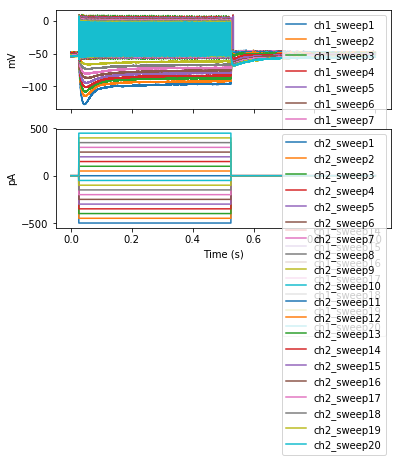

In [10]:
fig, ax = plt.subplots(2,1,sharex=True)
ax[0].plot(voltage_traces) # Pandas allows you to simply plot a set of columns of data.
ax[0].set_ylabel(meta['ch1_units'][0]) # Can label axis using the information from our meta data frame
ax[0].legend(voltage_traces.columns, loc='upper right') # Pandas "knows" the names of each columns you plotted, 
                                                        # which makes creating a legend straightforward

ax[1].plot(current_traces) 
ax[1].set_ylabel(meta['ch2_units'][0])
ax[1].set_xlabel('Time (s)')
ax[1].legend(current_traces.columns, loc='upper right')
plt.show()

This is really messy.
#### Excercise: 
* Try plotting only the last sweep of both current and voltage so that we can see what's going on more easily

In [11]:
# First find the column name for the last sweep  using the "tricks" above (there are multiple ways to do this)
lastSweep_voltage = voltage_traces.columns[-1]
lastSweep_current = current_traces.columns[-1]

print(lastSweep_voltage)
print(lastSweep_current)

ch1_sweep20
ch2_sweep20


In [12]:
# Now, use these  column id's to select only the columns containing data for the last sweep
last_voltage = voltage_traces[lastSweep_voltage]
last_current = current_traces[lastSweep_current]

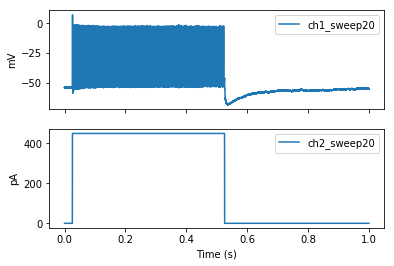

In [13]:
# Use these column id's to only plot the traces for these sweeps

fig, ax = plt.subplots(2,1,sharex=True)
ax[0].plot(last_voltage)
ax[0].set_ylabel(meta['ch1_units'][0])
ax[0].legend([lastSweep_voltage], loc='upper right')
ax[1].plot(last_current)
ax[1].set_ylabel(meta['ch2_units'][0])
ax[1].set_xlabel('Time (s)')
ax[1].legend([lastSweep_current], loc='upper right')
plt.show()

That looks better, but can we zoom in on some of the spikes in the voltage traces?
#### Excercise, plot only time points from 0.02 to 0.10 seconds

In [14]:
# define the range if indexes you want to select
inds = data.index[(0.02<data.index) & (data.index < 0.1)]

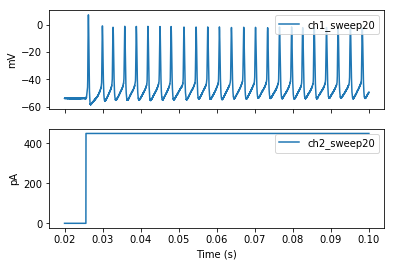

In [15]:
# Now repeat the plot above, only for the given indeces
fig, ax = plt.subplots(2,1,sharex=True)
ax[0].plot(last_voltage[inds])
ax[0].set_ylabel(meta['ch1_units'][0])
ax[0].legend([lastSweep_voltage], loc='upper right')
ax[1].plot(last_current[inds])
ax[1].set_ylabel(meta['ch2_units'][0])
ax[1].set_xlabel('Time (s)')
ax[1].legend([lastSweep_current], loc='upper right')
plt.show()

# Data Analysis for a single cell

A common way to show a neuron's response to input is to make a frequency-intensity curve.  The frequency of firing is plotted on the y-axis and the amplitude of the current injection that caused the spikes is plotted on the x-axis.  From looking at these f-i curves you can identify if the cell is transiently firing, whether the spike rate reaches a maximum at some high current step, the gain of firing (the slope of the line, in Hz/pA), etc.  To construct a f-i curve we need to first find the number of spikes in each sweep and the current injection that drove those spikes. Then plot it.

## Get firing rate of single sweep
* First, we will perform the analysis for just one sweep of data. Then we will define a function to automate the process, run the function on all sweeps using a for-loop, and plot the results in a F-I curve

* Becasue we have already pulled out the last voltage trace, let's go ahead and analyze this time-series first

#### Step 1: Locate the time points of all spikes
* There are a couple of ways to do this. We will do it by locating the relative maxima of the voltage trace during the current injection
* We will also set a threshold above which to detect maxima (to avoid counting maxima in the baseline as a spikes)

In [16]:
threshold = -20  

# Threshold the voltage trace to get rid of the noise floor. (If we didn't do this, we'd find a bunch of "spikes" (
# (relative maxima) in the noise - change the threshold to zero to see what this would look like)

last_voltage_thresholded = last_voltage[last_voltage>threshold]  

* Scipy has a nice function that finds the indices where relative maxima occur: argrelextrema
* This function takes two required arguments: data and comparator (for details see documentation at scipy website)
    * Note: last_voltage_threshold is a data frame. argrelextrema expects data to be an array, not a data frame
    * Note: argrelextrema also takes an optional argument: "order" that specifies the amount of points on each size to use for the comparison

In [17]:
# note the use of .values in this function call. scipy is expecting the data to be in the form of an array
i = ss.argrelextrema(data=last_voltage_thresholded.values, comparator=np.greater,order=1)

# the scipy function returns indexes i.e. 1,2 3... BUT we want the time points (which are stored in the index of our data frame)
spike_times = last_voltage_thresholded.index[i] 

* A last, finer point on physiology: It's possible that the voltage trace is a little noisy, even during a spike. This might cause a spike to be double counted by the scipy function. To fix these cases, we impose a constraint based on the refractory period of neuron

In [18]:
refractory_period_low_limit = 0.002  # 2ms is a lower limit on the refracotry period for a neuron
interspike_interval = np.ediff1d(spike_times)
VIOLATION_indexes = np.argwhere(interspike_interval<refractory_period_low_limit)
spike_times = spike_times.delete(VIOLATION_indexes)

* Let's plot this to see if we successfully found the spikes

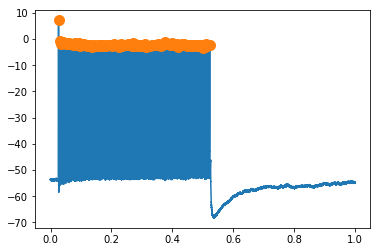

In [19]:
plt.figure()
plt.plot(last_voltage)
plt.plot(spike_times, last_voltage[spike_times], ".", markersize=20) # plot a point at each time point where a spike was detected
plt.show()

This is looking pretty good. 

### Excercise
* What happens if you now change the threshold to -60 and re-run the 4 cells above?

##### Let's zoom in on the trace to make sure we are in fact locating all the spikes

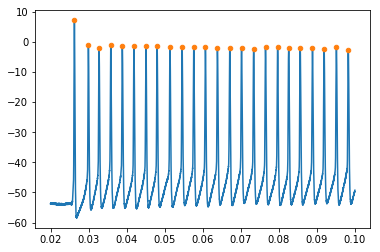

In [20]:
plt.figure()
plt.plot(last_voltage[inds])
plt.plot(last_voltage[inds][spike_times],".",markersize=9)
plt.show()

Great, looks like we are capturing all the spikes, not double counting, and not counting any noise as spikes. Let's use these spike times to calculate the firing frequency for this neuron during the current injection

#### Step 2: Find out the time window of current injection
* This is pretty straightforward for this experiment because as we saw earlier, it's just square pulse injections

In [21]:
current_magnitude = max(last_current.values)  
current_inj_times = last_current.index[last_current==current_magnitude]  # time points when current is being injected   
current_inj_length = max(current_inj_times) - min(current_inj_times)      # duration in seconds
print("Current injection: "+str(current_magnitude)+" pA")

Current injection: 450.0 pA


#### Step 3: Perform a final check on spike times
* Before we calculate the firing frequecny, there is one last check we must perform. It is possile that some spontaneous spikes occured outside the current injection window (it didn't happen in this case, but it could and that could change our results). To handle this, we remove all spikes times outside of the current injection window:

In [22]:
# remove all spikes occuring outside the current injection window using a boolean array

tf = (max(current_inj_times)>= spike_times) & (spike_times >= min(current_inj_times)) # boolean array (0's and 1's)
spike_times = spike_times[tf]   # only saving spike times where tf==1 e.g. during current injection

#### Step 4: Calculate the firing rate 
* There a couple different ways to calculate firing frequency. They are both useful and tell you different things. 
* The most straighforward way is to simply count the number of spikes and divide by the amout of time (in seconds) that the current was being injected.

In [23]:
n_spikes = len(spike_times)
spike_freq = n_spikes/current_inj_length

print("spiking frequency = " + str(round(spike_freq,2))+" Hz")

spiking frequency = 268.0 Hz


* The second way to go about this is to calculate the average interspike interval. This is particularly useful if the neuron does not continue to fire or adapts during the current injection.

In [24]:
# There is a nice numpy function to do this for you quickly: ediff1d  (see numpy documentation)

ISI = np.ediff1d(spike_times) #interspike interval

meanISI = np.mean(ISI)  # calculate the mean ISI

spike_freq = 1/meanISI  # ISI is in units of seconds, divide 1s/meanISI to get mean firing frequency
print("spiking frequency = " +str(round(spike_freq,2))+"Hz")

spiking frequency = 267.82Hz


For this cell, both methods give us basially the same result because as we saw above, this neuron fires pretty regularly and consistently during the entire stimulation. This isn't necesarily the case so it's good to check. 

* One final check we can perform is just to look at all the raw ISI values to make sure there wasn't a change in frequency over the course of the stimulation (high firing at the beginnning, slower at the end)

### Excercise: 
* go back and re-run everything below "step 1" but this time, DO NOT run the cell that correct for refractory period violations. This illustrates why this final histogram can be a good check on your analysis

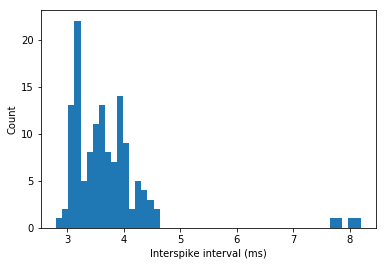

In [25]:
plt.figure()
plt.hist(ISI*1000,bins=50) # convert to ms by multiplying by 1000
plt.ylabel('Count')
plt.xlabel('Interspike interval (ms)')
plt.show()

This looks pretty good with the exception of a few outliers. At the very least, it confirms that there are no refractory period violations. 

### Summary: 
Although what we really want is the F-I curve for the cell, analyzing one sweep at a time, like we did here, is often a good idea. This way, you can make sure that the code you write is really analyzing the data in the way you intend.

## Create an F-I curve for a single cell

* To do this, we will perform the above analysis many times. Once for each current injection/sweep
* Because we are doing the same thing many times, rather than write all of the above code 20 times (once for each sweep), we'll write a "for" loop that performs the same operation many times
* When you are performing an operation many times, it is often nice to write function to perform this operation. We will write a function that returns the firing frequency for any sweep

### for-loops
* A for-loop will continue to evaluate all elements in the list provided
* In other words, there are 20 sweeps in meta, so the loop will run 20 times. Once for each sweep

In [26]:
sweeps = meta.index # list of all sweeps in this experiment

for sweep in sweeps:
    print sweep

sweep1
sweep2
sweep3
sweep4
sweep5
sweep6
sweep7
sweep8
sweep9
sweep10
sweep11
sweep12
sweep13
sweep14
sweep15
sweep16
sweep17
sweep18
sweep19
sweep20


* Another way to achieve this is:

In [27]:
for i in range(0, 20):
    print i

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


* Python also lets us combine both of the above examples:

In [28]:
for i, sweep in enumerate(sweeps):
    print i
    print sweep

0
sweep1
1
sweep2
2
sweep3
3
sweep4
4
sweep5
5
sweep6
6
sweep7
7
sweep8
8
sweep9
9
sweep10
10
sweep11
11
sweep12
12
sweep13
13
sweep14
14
sweep15
15
sweep16
16
sweep17
17
sweep18
18
sweep19
19
sweep20


Using a for loop, we can iterate over all the sweeps in this experiment and perform an operation for each one (in this case we just printed the name of the sweep). We will now do the exact same thing, but instead of printing the name, we will find the firing frequency for each of these sweeps

### Functions
* As we saw above, there is a litte bit of work that goes into calculating the firing frequency for a single sweep. We don't want to have to re-write all that code every time we want to calculate the firing rate.
* Functions let us write all that code one time, and then use it over and over again with a simple call.

In [29]:
# example function
def my_function():
    print "Hello world!"

* The cell above is a very simple example of a function. Now, whenever I want to print "Hello world!", all I need to do is call my_function:

In [30]:
my_function()

Hello world!


* What if I didn't want to say "hello world" every time I called my_function? In this case, I can pass a parameter into the function that tells my_function what to do 

In [31]:
def my_smart_function(thing_to_print):
    print thing_to_print
    
my_smart_function("I can say whatever I want")

I can say whatever I want


* Finally, what if I didn't want to print out the result, I just wanted to save it?
* For this, we use a return statement

In [32]:
def my_final_function(argument):
    return argument
function_output = my_final_function("My function returned something")

* Nothing was printed this time. But, we now have a new variable called function output:

In [33]:
print function_output

My function returned something


### Exercise:
* These function are all pretty useless. See if you can write a function called addition that takes two arguments (x and y) and return the sum of these two numbers

In [34]:
def addition(x,y):
    
    
    return

## Now that you have a general sense of what loops and functions can do, we are ready analyze our data

#### Step 1: Write a function that returns firing rate

In [35]:
def get_firing_rate(v, threshold, tstart, tend, method="ISI"):
    '''
    ================ This is called a doc string ====================
    ========== It tells you how to use the function =================
    Arguments:
        v (data frame): array of voltage values during one sweep with the index being the time series
        threshold (float): cut-off to count spikes
        tstart (float): time current injection begins
        tend (float): time current injection ends
        method (string, optional): method for calculating the firing rate
                ISI: use interspike interval
                AVG: use average over whole current injection window
    Output:
        firing_rate (float): firing rate during the period defined by tstart and tend
    '''
    refractory_limit=0.002 # set refractory period limit (to avoid double counting spikes)
    current_duration = tend-tstart
    
    v_thresh = v[v>threshold]
    
    spike_indexes = ss.argrelextrema(v_thresh.values, np.greater,order=1)  # indices of spikes (0,1,2...)
    spike_times = v_thresh.index[spike_indexes]  # convert to time (in seconds)   
    
    # get rid of refractory violations
    interspike_interval = np.ediff1d(spike_times)
    VIOLATION_indexes = np.argwhere(interspike_interval<refractory_limit)
    spike_times = spike_times.delete(VIOLATION_indexes)    # delete any spike times that occured too soon after a previous spike
    
    # get rid of spikes outside the current injection window
    tf = (tend >= spike_times) & (spike_times >= tstart) # boolean array (0's and 1's)
    spike_times = spike_times[tf]   # only saving spike times where tf==1 e.g. during current injection
    
    if method=="ISI":
        # calculate the firing frequency using interspike interval
        # in case there were no spikes, set firing rate to 0 Hz
        if spike_times.size==0:
            firing_rate=0  # there were no spikes, so firing rate is 0
        else:
            ISI = np.mean(np.ediff1d(spike_times))
            firing_rate = 1/ISI
    elif method=="AVG":
        firing_rate = len(spike_times)/current_duration
    
    return firing_rate

There is alot going on in that function. If you are confused on any part of it, please ask the instructor or TAs for assitance. 
* You should understand how the function works, and how to modify it if you need/want to
* You should understand the if-else statements at the end of the function definition

#### Step 2: Write a for-loop to calculate the firing rate for each sweep of data
* First let's intitalize some constants that we will use throughout the analysis

In [37]:
threshold = -20   # set threshold above which to detect spikes

# current duration is the same for all sweeps (we saw this above when we plotted all the traces) so let's just use the one
# from the last sweep:
current_magnitude = max(last_current.values)  
current_inj_times = last_current.index[last_current==current_magnitude]  # time points when current is being injected  
I_start = min(current_inj_times)
I_end = max(current_inj_times)
current_duration = max(current_inj_times) - min(current_inj_times)      # duration in seconds   

* Loop over all the sweeps, find the current magnitude and firing rate, print them out

In [38]:
# loop over all the sweeps in this experiment
for i, sweep in enumerate(sweeps):
    
    # Call our function that we just wrote for finding firing rate    
    firing_rate = get_firing_rate(data['ch1_'+sweep], threshold, I_start, I_end, method="ISI")  
    
    # get current injection magnitude
    # Note how we deal with negative current injections using if-else statements
    I_mag = max(data['ch2_'+sweep])
    if I_mag == 0 and min(data['ch2_'+sweep])==0:
        I_mag = 0
    elif I_mag == 0 and min(data['ch2_'+sweep]) != 0:
        I_mag = min(data['ch2_'+sweep])
    
    # print the result
    print(sweep+":  "+"I: "+str(I_mag)+" "+meta['ch2_units'][i]+ ",   Firing rate: "+str(firing_rate)+" Hz")

sweep1:  I: -500.0 pA,   Firing rate: 0 Hz
sweep2:  I: -450.0 pA,   Firing rate: 0 Hz
sweep3:  I: -400.0 pA,   Firing rate: 0 Hz
sweep4:  I: -350.0 pA,   Firing rate: 0 Hz
sweep5:  I: -300.0 pA,   Firing rate: 0 Hz
sweep6:  I: -250.0 pA,   Firing rate: 0 Hz
sweep7:  I: -200.0 pA,   Firing rate: 0 Hz
sweep8:  I: -150.0 pA,   Firing rate: 0 Hz
sweep9:  I: -100.0 pA,   Firing rate: 0 Hz
sweep10:  I: -50.0 pA,   Firing rate: 0 Hz
sweep11:  I: 0 pA,   Firing rate: 0 Hz
sweep12:  I: 50.0 pA,   Firing rate: 91.3232876712 Hz
sweep13:  I: 100.0 pA,   Firing rate: 118.079399011 Hz
sweep14:  I: 150.0 pA,   Firing rate: 145.729830385 Hz
sweep15:  I: 200.0 pA,   Firing rate: 166.198832543 Hz
sweep16:  I: 250.0 pA,   Firing rate: 185.082744885 Hz
sweep17:  I: 300.0 pA,   Firing rate: 206.924963838 Hz
sweep18:  I: 350.0 pA,   Firing rate: 223.973223834 Hz
sweep19:  I: 400.0 pA,   Firing rate: 243.008495341 Hz
sweep20:  I: 450.0 pA,   Firing rate: 267.81850584 Hz


There's a lot of stuff going on here as well. Some key takeaways:
* Make sure you understand the for loop, what it's doing, and why it's useful
* Make sure that the if-else statements inside the for loop are making sense
* If you are confused on these points, ask the instructor or a TA

Now that we understand how the code above is working, let's run it again but this time actually save the results instead of just printing them out. To save our results, let's create a new data frame called "results" to store everything

In [39]:
# create a new data frame from scratch
results = pd.DataFrame(columns=["Current Injection", "Firing Rate"],index = meta.index)
results.head()

,Current Injection,Firing Rate
sweep1,NaN,NaN
sweep2,NaN,NaN
sweep3,NaN,NaN
sweep4,NaN,NaN
sweep5,NaN,NaN


In [40]:
# Now, let's re-run the for loop and fill up this data frame with our results

for i, sweep in enumerate(sweeps):
    firing_rate = get_firing_rate(data['ch1_'+sweep],threshold,I_start,I_end,method="ISI")
    
    I_mag = max(data['ch2_'+sweep])
    if I_mag == 0 and min(data['ch2_'+sweep])==0:
        I_mag = 0
    elif I_mag == 0 and min(data['ch2_'+sweep]) != 0:
        I_mag = min(data['ch2_'+sweep])
       
    results['Current Injection'][sweep]=I_mag
    results['Firing Rate'][sweep]=firing_rate

Now, we have stored all our results into a new data frame.

In [41]:
results

,Current Injection,Firing Rate
sweep1,-500,0
sweep2,-450,0
sweep3,-400,0
sweep4,-350,0
sweep5,-300,0
sweep6,-250,0
sweep7,-200,0
sweep8,-150,0
sweep9,-100,0
sweep10,-50,0


Now, we can create our f-i plot for this neuron

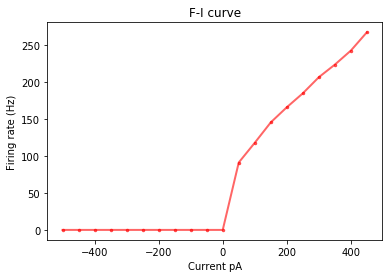

In [42]:
plt.figure()
plt.plot(results['Current Injection'].values, results['Firing Rate'].values, ".-", color="r", lw=2,
         markersize=5, alpha=0.6)
plt.xlabel('Current '+meta['ch2_units'][0])
plt.ylabel('Firing rate (Hz)')
plt.title('F-I curve')
plt.show()

Cool, we now have an F-I curve for this PV neuron. 

### Excercise, do the same analysis but calculate frequency as n_spikes/time instead of using the ISI as we just did
* Add the result to the data frame called results and name this column "Firing rate (avg)"
* hint: one way to add a column to a data frame is to make a series and then add it to the original data frame
    * newcolumn = pd.series(index=, name=)
    * pd.concat((results,newcolumn),axis=1)
* Once you've accomplished all this, plot the results alongside the trace above

In [43]:
# Make a new column using a pandas series (new column = pd.Series)
newColumn = pd.Series(index=sweeps, name="Firing Rate (avg)")

In [44]:
for i, sweep in enumerate(sweeps):
    
    firing_rate = get_firing_rate(data['ch1_'+sweep],threshold,I_start,I_end, method="AVG")
  
    I_mag = max(data['ch2_'+sweep])
    if I_mag == 0 and min(data['ch2_'+sweep])==0:
        I_mag = 0
    elif I_mag == 0 and min(data['ch2_'+sweep]) != 0:
        I_mag = min(data['ch2_'+sweep])
    
    newColumn[sweep]=firing_rate

In [45]:
results = pd.concat((results,newColumn),axis=1)

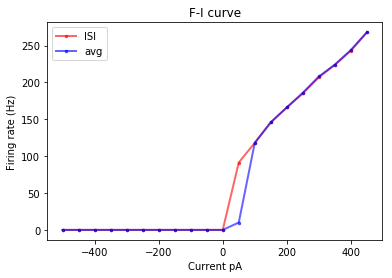

In [46]:
plt.figure()
plt.plot(results['Current Injection'].values, results['Firing Rate'].values, ".-", color="r", lw=2,
         markersize=5, alpha=0.6)
plt.plot(results['Current Injection'].values, results['Firing Rate (avg)'].values, ".-", color="b", lw=2,
         markersize=5, alpha=0.6)
plt.xlabel('Current '+meta['ch2_units'][0])
plt.ylabel('Firing rate (Hz)')
plt.legend(['ISI', 'avg'])
plt.title('F-I curve')
plt.show()

Basically, we get the same result. However, we do see a clear difference for the first positive current step, when the cell did not continue to fire over the course of the current injection but only fired a burst of spikes at the beginning of stimulation

## Let's now load the data for multiple cells, and perform this same analysis for all of them at once

In [47]:
# Creating csv's for all the data files in raw_data

from os import listdir    # Function used to list all objects inside a folder

allData = listdir(path+'Raw_Data/')  # get a list of all data files in the folder
allData = [f for f in allData if f[-3:]=="abf"]  # use list comprehension to get only files ending in abf

# loop over all files and create csv's
for f in allData:
    _, _ = binary_to_csv(filename=path+"Raw_Data/"+f)  # Using underscores is common practice when you don't care about saving a function's output


saving data in csv format. Stored in csv_data folder
saving data in csv format. Stored in csv_data folder
saving data in csv format. Stored in csv_data folder
saving data in csv format. Stored in csv_data folder
saving data in csv format. Stored in csv_data folder
saving data in csv format. Stored in csv_data folder
saving data in csv format. Stored in csv_data folder


In [48]:
allCsvs = listdir(path+"csv_data")
for f in allCsvs:
    if "meta" in f:
        meta = pd.read_csv(path+"csv_data/"+f, index_col=0)
        print meta.columns

Index([u'fs', u'celltype', u'date', u'ch1_units'], dtype='object')
Index([u'fs', u'celltype', u'date', u'ch1_units'], dtype='object')
Index([u'fs', u'celltype', u'date', u'ch1_units'], dtype='object')
Index([u'fs', u'celltype', u'date', u'ch1_units'], dtype='object')
Index([u'fs', u'celltype', u'date', u'ch1_units'], dtype='object')
Index([u'fs', u'celltype', u'date', u'ch1_units', u'ch2_units'], dtype='object')
Index([u'fs', u'celltype', u'date', u'ch1_units'], dtype='object')


# Note:
* looks like there are issues with the data I got from Tim. (There are no current traces for any of the files except the one I already analyzed above). Need to talk to him before I proceed here...

My plan was/is to read in all the files and create a dictionary of data frames. Each entry in the dictionary would be a neuron and it would contain two data frames: meta data and data (like we have above). Then I'd loop through these cells, do the analysis, save results in a new results data frame (that has results for all the cells). Using this results data frame, could then do some visualization/summary of the data based on if neurons were pyramidal neurons or PV neurons.